In [1]:
import pandas as pd
import numpy as np

In [2]:
a = pd.read_csv('~/Downloads/airbnb-listings.csv', delimiter = ';', low_memory = False)

In [3]:
df = a[a['Country'] == 'United States']

In [4]:
df1 = df.drop(['Listing Url','Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url','Host URL','Host Thumbnail Url', 
              'Host Picture Url','Latitude', 'Longitude'], axis = 1)

In [5]:
df1.shape

(134545, 79)

In [6]:
df2= df1.drop(['Scrape ID','ID','Name','Summary','Description','Experiences Offered','Neighborhood Overview','Notes','Transit','Access',
           'Interaction','House Rules','Host Name','Host About','Host Verifications','Amenities','Calendar Updated',
            'Has Availability','Geolocation','Features','License','Host Acceptance Rate',
                  'Neighbourhood Group Cleansed','Space','Host Location','First Review','Last Review',
                 'Jurisdiction Names','Last Scraped','Smart Location','Country Code','Country',
                  'Calendar last Scraped','City','Street'], axis = 1)

In [7]:
df2.shape

(134545, 44)

In [8]:
df2.columns

Index(['Host ID', 'Host Since', 'Host Response Time', 'Host Response Rate',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Neighbourhood', 'Neighbourhood Cleansed',
       'State', 'Zipcode', 'Market', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Square Feet', 'Price', 'Weekly Price', 'Monthly Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')

In [32]:
df2 = df2[df2['Price'].notna()]

In [33]:
(df2.isnull().sum()/len(df2)*100).sort_values(ascending=False) # sinse square feet,weekely price monthly price has null values 
                                                      # more than 80% we will drop them

Square Feet                       98.463581
Weekly Price                      82.722260
Monthly Price                     79.415603
Security Deposit                  56.767561
Cleaning Fee                      27.537128
Review Scores Value               23.702491
Review Scores Location            23.682881
Review Scores Checkin             23.682881
Review Scores Accuracy            23.622540
Review Scores Cleanliness         23.585582
Review Scores Communication       23.584827
Review Scores Rating              23.454341
Host Response Time                22.580913
Host Response Rate                22.580913
Reviews per Month                 22.350865
Neighbourhood                     19.881431
Host Neighbourhood                16.144093
Zipcode                            1.255836
Market                             0.761044
Bathrooms                          0.316033
Host Since                         0.214963
Host Listings Count                0.214963
Host Total Listings Count       

In [12]:
df2.loc[:,['Security Deposit','Price']].corr()

,Security Deposit,Price
Security Deposit,1.000000,0.393314
Price,0.393314,1.000000


In [14]:
df2['Security Deposit'].median()

250.0

In [16]:
df2['Security Deposit'].mean()

274.7632734530938

In [19]:
df2['Security Deposit'].std()

167.88686203172315

In [20]:
df2['Security Deposit'].min(),df2['Security Deposit'].max()

(0.0, 999.0)

In [ ]:
# we will impute median in it as the value is revolving around 250

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132581 entries, 241 to 494571
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Host ID                         132581 non-null  int64  
 1   Host Since                      132296 non-null  object 
 2   Host Response Time              102643 non-null  object 
 3   Host Response Rate              102643 non-null  float64
 4   Host Neighbourhood              111177 non-null  object 
 5   Host Listings Count             132296 non-null  float64
 6   Host Total Listings Count       132296 non-null  float64
 7   Neighbourhood                   106222 non-null  object 
 8   Neighbourhood Cleansed          132581 non-null  object 
 9   State                           132578 non-null  object 
 10  Zipcode                         130916 non-null  object 
 11  Market                          131572 non-null  object 
 12  Property Type 

In [36]:
df2['Host Response Time'].unique()

array(['within an hour', 'within a day', 'within a few hours', nan,
       'a few days or more'], dtype=object)

In [37]:
df2['Host Response Rate'].unique()      

array([100.,  96.,  94.,  nan,  78.,  40.,  80.,  82.,  99.,  86.,  91.,
        70.,  84.,  90.,  89.,  63.,  93.,  97.,  88.,  73.,  95.,   0.,
        75.,  98.,  50.,  57.,  60.,  83.,  87.,  92.,  72.,  56.,  43.,
        71.,  85.,  67.,  33.,  25.,  30.,  79.,  81.,  74.,  20.,  69.,
        66.,  44.,  47.,  65.,  48.,  17.,  64.,  29.,  68.,  46.,  61.,
        14.,  53.,  77.,  58.,  38.,  41.,  76.,  52.,  36.,  55.,  13.,
        42.,  51.,  59.,  11.,  54.,  10.,  45.,  62.,   8.,  23.,   9.,
        27.,   7.,  32.,  31.,  35.,  39.,  19.,   4.,  22.,  18.,   5.,
        15.,   6.,  24.,   3.,  28.,  49.,  34.])

In [38]:
df2['Neighbourhood'].unique()                       # nlp lagegi dono me so we will drop

array(['Humboldt Park', nan, 'Garfield Park', ...,
       'Southeast Oakland Hills', 'Chillum, MD', 'Richmond Annex'],
      dtype=object)

In [39]:
df2['Host Neighbourhood'].unique()

array(['Humboldt Park', 'Garfield Park', 'Near West Side', ...,
       'Golden Glades', 'Lahaina', 'Rose Garden'], dtype=object)

In [43]:
df2.drop(['Neighbourhood','Host Neighbourhood','Square Feet','Weekly Price','Monthly Price'],axis=1,inplace=True)


In [44]:
df2.shape

(132581, 39)

In [45]:
((df2.isnull().sum()*100)/len(df2)).sort_values(ascending=False)

Security Deposit                  56.767561
Cleaning Fee                      27.537128
Review Scores Value               23.702491
Review Scores Location            23.682881
Review Scores Checkin             23.682881
Review Scores Accuracy            23.622540
Review Scores Cleanliness         23.585582
Review Scores Communication       23.584827
Review Scores Rating              23.454341
Host Response Time                22.580913
Host Response Rate                22.580913
Reviews per Month                 22.350865
Zipcode                            1.255836
Market                             0.761044
Bathrooms                          0.316033
Host Listings Count                0.214963
Host Since                         0.214963
Host Total Listings Count          0.214963
Beds                               0.165936
Bedrooms                           0.117664
Accommodates                       0.046010
Property Type                      0.004526
State                           

In [46]:
df2.shape

(132581, 39)

In [47]:
df2 = df2[df2['State'].notna()]

In [48]:
df2.shape

(132578, 39)

In [49]:
df2 = df2[df2['Property Type'].notna()]

In [51]:
df2 = df2[df2['Accommodates'].notna()]

In [52]:
df2 = df2[df2['Bedrooms'].notna()]

In [53]:
df2 = df2[df2['Beds'].notna()]

In [54]:
df2 = df2[df2['Host Total Listings Count'].notna()]

In [55]:
df2 = df2[df2['Host Since'].notna()]

In [56]:
df2 = df2[df2['Host Listings Count'].notna()]

In [57]:
df2 = df2[df2['Bathrooms'].notna()]

In [58]:
df2 = df2[df2['Market'].notna()]

In [59]:
df2.shape

(130571, 39)

In [60]:
132578-130571

2007

In [75]:
((df2.isnull().sum()*100)/len(df2)).sort_values(ascending=False)

Security Deposit                  56.795154
Cleaning Fee                      27.472410
Review Scores Value               23.388042
Review Scores Location            23.368129
Review Scores Checkin             23.368129
Review Scores Accuracy            23.306094
Review Scores Cleanliness         23.270098
Review Scores Communication       23.268567
Review Scores Rating              23.139135
Host Response Time                22.393947
Host Response Rate                22.393947
Reviews per Month                 22.053136
Zipcode                            1.232280
Accommodates                       0.000000
Availability 90                    0.000000
Calculated host listings count     0.000000
Cancellation Policy                0.000000
Host Listings Count                0.000000
Host Total Listings Count          0.000000
Neighbourhood Cleansed             0.000000
State                              0.000000
Market                             0.000000
Property Type                   

In [85]:
# now dealing with the null values
df_num=df2.select_dtypes(include=np.number)
df_num.columns

Index(['Host Response Rate', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Calculated host listings count',
       'Reviews per Month'],
      dtype='object')

In [78]:
df2.drop('Host ID',axis=1,inplace=True)

In [80]:
df2['Host Total Listings Count'].unique() # this column is of no use as it has values in exponential

array([2.000e+00, 1.000e+00, 3.000e+00, 1.600e+01, 9.000e+00, 4.000e+00,
       7.000e+00, 1.200e+01, 6.000e+00, 1.900e+01, 2.300e+01, 2.700e+01,
       2.400e+01, 2.100e+01, 1.000e+01, 1.500e+01, 5.000e+00, 1.100e+01,
       2.500e+01, 3.600e+01, 2.000e+01, 1.800e+01, 8.000e+00, 1.300e+01,
       6.000e+01, 8.200e+01, 2.120e+02, 2.600e+01, 5.400e+01, 9.500e+01,
       4.720e+02, 3.720e+02, 1.190e+02, 3.070e+02, 0.000e+00, 3.000e+01,
       1.030e+02, 1.700e+01, 1.400e+01, 2.900e+01, 5.280e+02, 3.500e+01,
       3.300e+01, 2.200e+01, 3.400e+01, 4.300e+01, 4.200e+01, 1.730e+02,
       6.080e+02, 5.520e+02, 5.200e+01, 7.490e+02, 3.630e+02, 3.700e+01,
       5.580e+02, 3.130e+02, 1.850e+02, 2.330e+02, 2.950e+02, 8.500e+01,
       5.000e+01, 3.410e+02, 1.870e+02, 2.800e+01, 4.790e+02, 6.900e+01,
       1.780e+02, 1.620e+02, 6.200e+01, 4.500e+01, 5.600e+01, 7.200e+01,
       4.250e+02, 1.770e+02, 4.100e+01, 4.700e+01, 1.050e+02, 3.540e+02,
       5.020e+02, 1.690e+02, 3.390e+02, 5.300e+01, 

In [81]:
df2.drop('Host Total Listings Count',axis=1,inplace=True)

In [83]:
df2['Host Listings Count'].unique()  # this column too

array([2.000e+00, 1.000e+00, 3.000e+00, 1.600e+01, 9.000e+00, 4.000e+00,
       7.000e+00, 1.200e+01, 6.000e+00, 1.900e+01, 2.300e+01, 2.700e+01,
       2.400e+01, 2.100e+01, 1.000e+01, 1.500e+01, 5.000e+00, 1.100e+01,
       2.500e+01, 3.600e+01, 2.000e+01, 1.800e+01, 8.000e+00, 1.300e+01,
       6.000e+01, 8.200e+01, 2.120e+02, 2.600e+01, 5.400e+01, 9.500e+01,
       4.720e+02, 3.720e+02, 1.190e+02, 3.070e+02, 0.000e+00, 3.000e+01,
       1.030e+02, 1.700e+01, 1.400e+01, 2.900e+01, 5.280e+02, 3.500e+01,
       3.300e+01, 2.200e+01, 3.400e+01, 4.300e+01, 4.200e+01, 1.730e+02,
       6.080e+02, 5.520e+02, 5.200e+01, 7.490e+02, 3.630e+02, 3.700e+01,
       5.580e+02, 3.130e+02, 1.850e+02, 2.330e+02, 2.950e+02, 8.500e+01,
       5.000e+01, 3.410e+02, 1.870e+02, 2.800e+01, 4.790e+02, 6.900e+01,
       1.780e+02, 1.620e+02, 6.200e+01, 4.500e+01, 5.600e+01, 7.200e+01,
       4.250e+02, 1.770e+02, 4.100e+01, 4.700e+01, 1.050e+02, 3.540e+02,
       5.020e+02, 1.690e+02, 3.390e+02, 5.300e+01, 

In [84]:
df2.drop('Host Listings Count',axis=1,inplace=True)

In [86]:
df['Guests Included'].unique()

array([ 1.,  2.,  6.,  4.,  5.,  3., 10.,  7.,  8., 16.,  0., 12., 14.,
       11., 13.,  9., 15., 18., 20.])

In [87]:
df['Extra People'].unique()

array([  0.,  25.,  15.,  10.,  20.,  30.,  50.,  35., 100.,  19.,  40.,
         8.,  18.,   9.,   5.,  75., 200.,  29.,  39.,  12.,  70.,  17.,
        24.,  65.,  45.,  49.,   7.,  14.,  33.,  98.,  22., 185., 250.,
        46.,  59., 130.,  60.,  95., 150.,  27.,  34., 129.,  36.,  11.,
       120., 125., 300.,  47.,  80.,  85.,  28.,   6.,  58.,  44.,  99.,
        26.,  55.,  32.,  13., 199.,  16., 145.,  90.,  86.,  21.,  42.,
       189.,  69., 169.,  83.,  38.,  56.,  23., 140.,  53.,  79., 275.,
       220., 175.,  48.,  92.,  31., 215.,  89.,  43.,  37., 299., 280.,
       160., 500., 115.,  88.,  57.,  66.,  62.,  82., 225.,  67., 149.,
       105.,  74.,  41., 176., 155.,  68.,  51., 179.,  72., 180.,  52.,
        63., 170.,  64., 255.,   1.,  84.,  71.,  93., 101.,  77., 111.,
        54.,  97., 110., 135., 285.,  94., 164., 190., 148., 165., 295.,
        87.,  76., 195.])

In [ ]:
#these both the columns are of no use

In [89]:
df2.rename({'Extra People':'Extra_people','Guests Included':'Guest_included'},axis=1,inplace=True)

In [ ]:
# ho: extra people dont have ane effect on price
#ha : extra people have effects on price

In [90]:
import statsmodels.formula.api as sma 
from statsmodels.stats.anova import anova_lm 

model = sma.ols('Price ~ Extra_people', data = df2).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Extra_people,1.0,2.378405e+07,2.378405e+07,1282.448826,1.691244e-279
Residual,130569.0,2.421507e+09,1.854580e+04,NaN,NaN


In [92]:
df2.columns

Index(['Host Since', 'Host Response Time', 'Host Response Rate',
       'Neighbourhood Cleansed', 'State', 'Zipcode', 'Market', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed Type', 'Price', 'Security Deposit', 'Cleaning Fee',
       'Guest_included', 'Extra_people', 'Minimum Nights', 'Maximum Nights',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')

In [96]:
import statsmodels.formula.api as sma 
from statsmodels.stats.anova import anova_lm 
                                                         # p value si less than 0.05 we can say thaat extra people willhave diffrenet effect on price
model = sma.ols('Price ~ Extra_people', data = df2).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Extra_people,1.0,2.378405e+07,2.378405e+07,1282.448826,1.691244e-279
Residual,130569.0,2.421507e+09,1.854580e+04,NaN,NaN


In [97]:
df2.drop('Guest_included',axis=1,inplace=True)

In [98]:
df_num=df2.select_dtypes(include=np.number)

In [99]:
df_num.columns

Index(['Host Response Rate', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Extra_people',
       'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Calculated host listings count',
       'Reviews per Month'],
      dtype='object')

In [102]:
import scipy.stats as stats
stats.ttest_ind(df2['Availability 365'],df2['Price'])

Ttest_indResult(statistic=22.727730138506452, pvalue=3.0790777532135613e-114)

In [103]:
import scipy.stats as stats
stats.ttest_ind(df2['Availability 90'],df2['Price'])

Ttest_indResult(statistic=-295.9058486867535, pvalue=0.0)

In [104]:
import scipy.stats as stats
stats.ttest_ind(df2['Availability 60'],df2['Price'])

Ttest_indResult(statistic=-342.9209899615569, pvalue=0.0)

In [105]:
import scipy.stats as stats
stats.ttest_ind(df2['Availability 30'],df2['Price'])

Ttest_indResult(statistic=-383.1667294589351, pvalue=0.0)

In [106]:
# we cantt remove all these as p value is less  than 0.05 

In [108]:
df2.loc[:,['Availability 30','Price']].corr()

,Availability 30,Price
Availability 30,1.000000,0.055439
Price,0.055439,1.000000


In [109]:
df2.loc[:,['Availability 365','Price']].corr()  # correlation is suggesting no relationship with price but testing is showing 

,Availability 365,Price
Availability 365,1.000000,0.041704
Price,0.041704,1.000000


In [110]:
# now imputing null values

In [111]:
df2['Beds'].median()

1.0

In [112]:
df2['Bedrooms'].median()

1.0

In [115]:
df2['Bathrooms'].unique()

array([1. , 1.5, 2. , 3. , 3.5, 2.5, 5. , 4.5, 0.5, 4. , 0. , 5.5, 8. ,
       6. , 6.5, 7. ])

In [114]:
df2['Bedrooms'].unique()

array([ 1.,  2.,  3.,  5.,  0.,  4.,  6.,  7.,  8., 10.,  9.])

In [119]:
df2.loc[df2['Bathrooms']==6,'Property Type']   # kuch impute nhi kar payege ase search karke so will impute median

6184          House
10501         Other
30856         House
30858         House
31292         House
74836         House
90628     Apartment
105827        House
120197        House
136872        House
143221        House
146564        Other
189938        House
202696        House
230135        House
232260        Other
262103        House
262125        House
269597        House
293622        House
309901        House
315963        House
319005        House
321064        House
358131        House
358148        House
393258        Other
401759        Other
427015    Townhouse
437209        House
453011        House
478688        House
Name: Property Type, dtype: object

In [122]:
df_num.isnull().sum().sort_values()

Availability 60                       0
Accommodates                          0
Bathrooms                             0
Bedrooms                              0
Beds                                  0
Price                                 0
Number of Reviews                     0
Availability 365                      0
Extra_people                          0
Minimum Nights                        0
Maximum Nights                        0
Availability 30                       0
Calculated host listings count        0
Availability 90                       0
Reviews per Month                 28795
Host Response Rate                29240
Review Scores Rating              30213
Review Scores Communication       30382
Review Scores Cleanliness         30384
Review Scores Accuracy            30431
Review Scores Checkin             30512
Review Scores Location            30512
Review Scores Value               30538
Cleaning Fee                      35871
Security Deposit                  74158


In [128]:
#creating imputer for imputing numeriacl variables

In [130]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer=imputer.fit(df_num)
df_num1=imputer.transform(df_num)


In [132]:
df_num2=pd.DataFrame(df_num1,columns=df_num.columns)

In [134]:
df_num2.isnull().sum() # we have dealt with all the issing values in the numericl column

Host Response Rate                0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Price                             0
Security Deposit                  0
Cleaning Fee                      0
Extra_people                      0
Minimum Nights                    0
Maximum Nights                    0
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Rating              0
Review Scores Accuracy            0
Review Scores Cleanliness         0
Review Scores Checkin             0
Review Scores Communication       0
Review Scores Location            0
Review Scores Value               0
Calculated host listings count    0
Reviews per Month                 0
dtype: int64

In [135]:
df_cat=df2.select_dtypes(include='object')

In [136]:
df_cat.columns

Index(['Host Since', 'Host Response Time', 'Neighbourhood Cleansed', 'State',
       'Zipcode', 'Market', 'Property Type', 'Room Type', 'Bed Type',
       'Cancellation Policy'],
      dtype='object')

In [137]:
df_cat.isnull().sum()

Host Since                    0
Host Response Time        29240
Neighbourhood Cleansed        0
State                         0
Zipcode                    1609
Market                        0
Property Type                 0
Room Type                     0
Bed Type                      0
Cancellation Policy           0
dtype: int64

In [138]:
# only two have null values

In [141]:
df2['Host Response Time'].mode()

0    within an hour
dtype: object

In [142]:
df_cat['Host Response Time']=df_cat['Host Response Time'].fillna('within an hour')

C:\Users\SIDDHA~1\AppData\Local\Temp/ipykernel_9688/3972624460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Host Response Time']=df_cat['Host Response Time'].fillna('within an hour')


In [146]:
df_cat['Zipcode'].mode()

0    11211
dtype: object

In [147]:
df_cat['Zipcode']=df_cat['Zipcode'].fillna(11211)

C:\Users\SIDDHA~1\AppData\Local\Temp/ipykernel_9688/18202732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Zipcode']=df_cat['Zipcode'].fillna(11211)


In [148]:
from warnings import filterwarnings
filterwarnings('ignore')

In [149]:
df_cat.isnull().sum()

Host Since                0
Host Response Time        0
Neighbourhood Cleansed    0
State                     0
Zipcode                   0
Market                    0
Property Type             0
Room Type                 0
Bed Type                  0
Cancellation Policy       0
dtype: int64

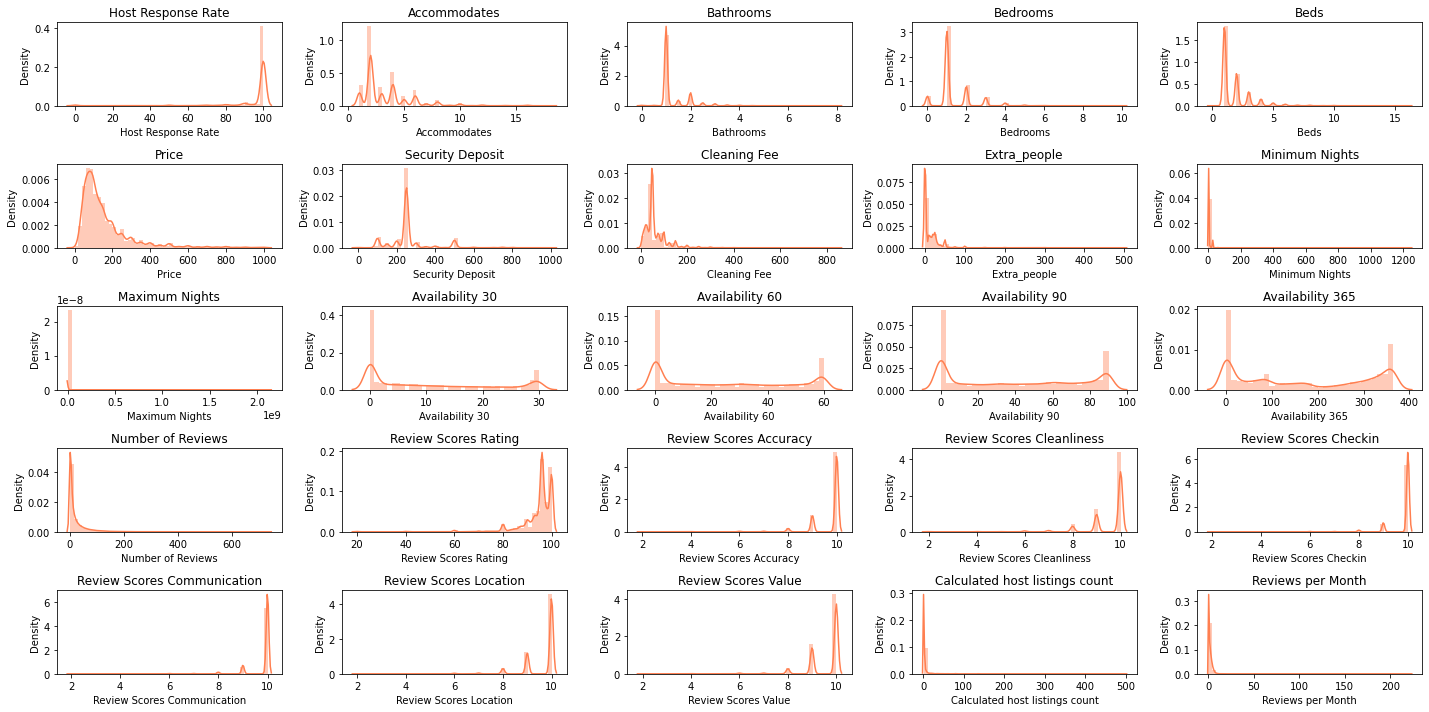

In [156]:
a=5
b=5
c=1
cols=df_num2.columns
plt.figure(figsize=[20,10])
for i in cols:
    plt.subplot(a,b,c)
    plt.title(i)
    sns.distplot(df_num2.loc[:,i],color='coral')
    c=c+1
plt.tight_layout()
plt.show()

In [155]:
# as seen from the distplot data is not normal

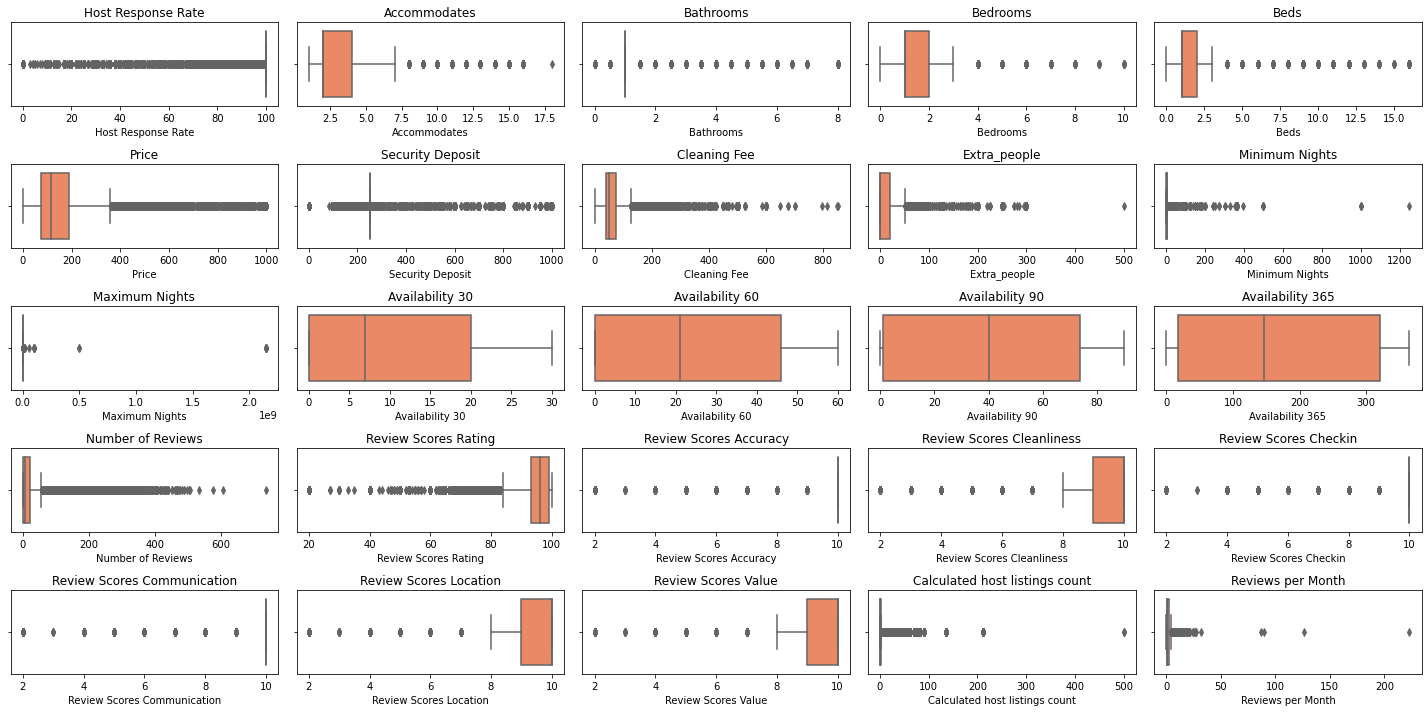

In [157]:
a=5
b=5
c=1
cols=df_num2.columns
plt.figure(figsize=[20,10])
for i in cols:
    plt.subplot(a,b,c)
    plt.title(i)
    sns.boxplot(df_num2.loc[:,i],color='coral')
    c=c+1
plt.tight_layout()
plt.show()
    

In [158]:
# datacontains lot of outliers

<BarContainer object of 3 artists>

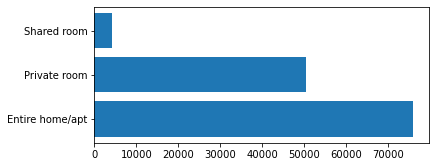

In [163]:
df1 = df2.groupby("Room Type").count()["State"].reset_index().sort_values("State", ascending=False)

plt.figure(figsize=(6,2.5))
plt.barh(df1["Room Type"], df1["State"])           # entire home or apartments are the main listingson airbnb
# we can conclude that people listed his  full apartment/entire house on rent on airbnb rather than giving single room 

In [174]:
df_num2.columns

Index(['Host Response Rate', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Extra_people',
       'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Calculated host listings count',
       'Reviews per Month'],
      dtype='object')

<AxesSubplot:xlabel='Beds', ylabel='Price'>

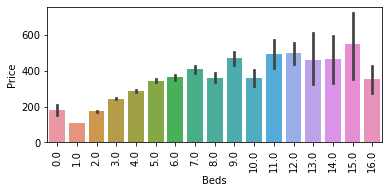

In [171]:
plt.figure(figsize=(6,2.5))
plt.xticks(rotation=90)
sns.barplot(x=df_num["Beds"], y=df_num["Price"],data=df_num) 

In [ ]:
# as we can see that price depends upon no of beds but also on other things like location if itis not like that 
# then no of beds should have highest price

<AxesSubplot:xlabel='Host Response Rate', ylabel='Price'>

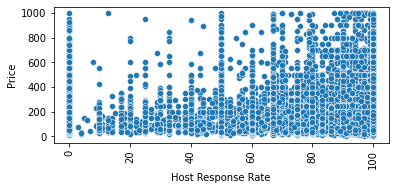

In [173]:
plt.figure(figsize=(6,2.5))
plt.xticks(rotation=90)
sns.scatterplot(x=df_num2["Host Response Rate"], y=df_num2["Price"],data=df_num2) 

<AxesSubplot:xlabel='Number of Reviews', ylabel='Price'>

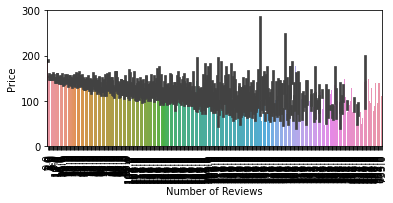

In [178]:
plt.figure(figsize=(6,2.5))
plt.xticks(rotation=90)
sns.barplot(x=df_num2["Number of Reviews"], y=df_num2["Price"],data=df_num2) 

In [181]:
df_num2['Review Scores Rating'].unique()

array([100.,  96.,  97.,  95.,  87.,  93.,  91.,  98.,  92.,  94.,  88.,
        80.,  99.,  90.,  83.,  79.,  86.,  81.,  74.,  89.,  68.,  82.,
        30.,  85.,  73.,  84.,  60.,  78.,  72.,  70.,  75.,  77.,  67.,
        40.,  20.,  76.,  71.,  65.,  53.,  64.,  55.,  63.,  50.,  69.,
        47.,  27.,  66.,  52.,  49.,  56.,  57.,  54.,  48.,  62.,  43.,
        46.,  58.,  44.,  35.,  33.])

<AxesSubplot:xlabel='Review Scores Rating', ylabel='Price'>

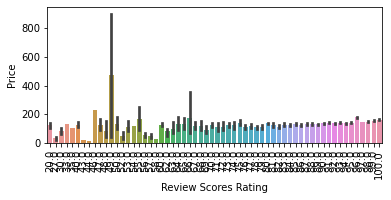

In [182]:
plt.figure(figsize=(6,2.5))
plt.xticks(rotation=90)
sns.barplot(x=df_num2['Review Scores Rating'], y=df_num2["Price"],data=df_num2) 

In [183]:
log=np.log(df_num2.Price)
sqrt=np.sqrt(df_num2.Price)
recp=np.reciprocal(df_num2.Price)

In [184]:
transformed=pd.DataFrame({'Log':log,'SQRT':sqrt,'RECP':recp})

In [185]:
transformed.skew()

Log         NaN
SQRT    1.41584
RECP        NaN
dtype: float64

In [ ]:
# jada kuch fark ni ara 

In [187]:
#so we will go by standard scaler

In [197]:
from sklearn.preprocessing import StandardScaler

In [194]:
from sklearn.preprocessing import PowerTransformer

In [198]:
sc=StandardScaler()
a=sc.fit_transform(df_num2)

In [200]:
df_num3=pd.DataFrame(a,columns=df_num2.columns)


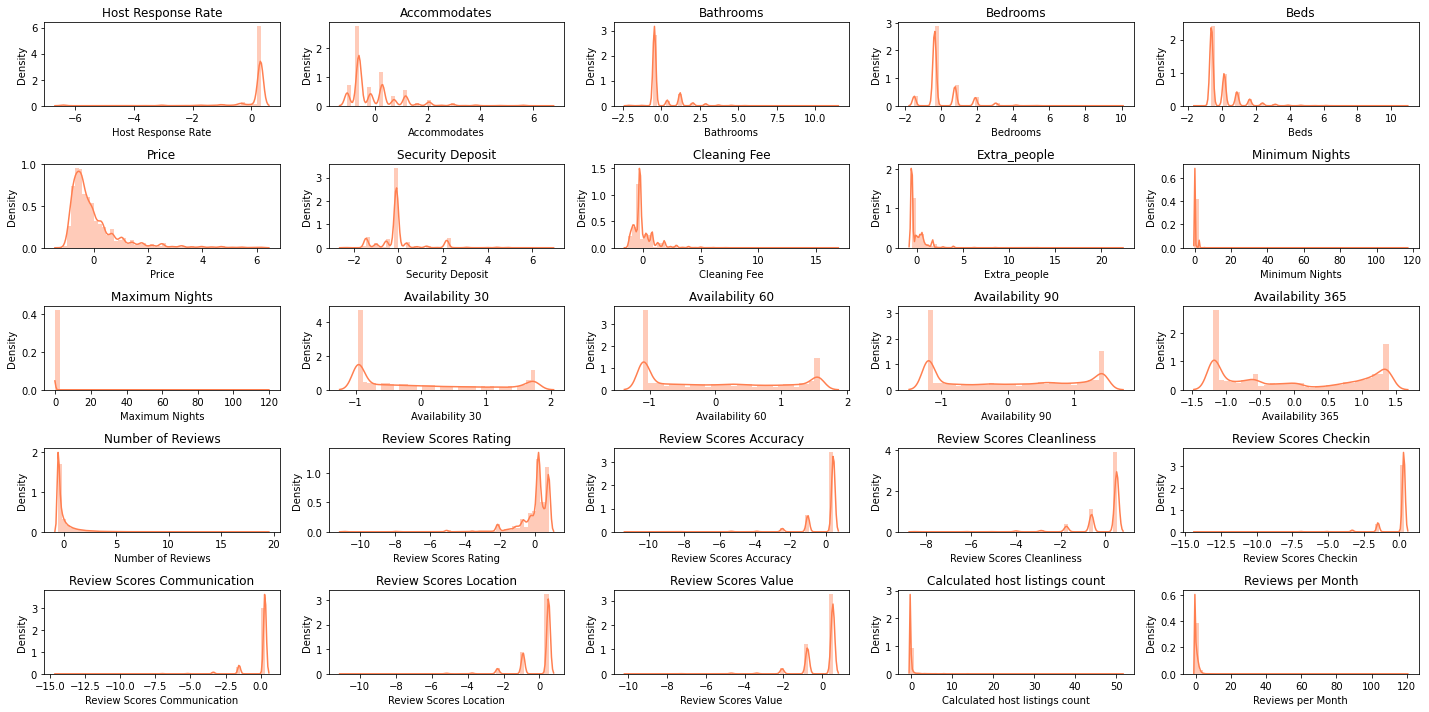

In [203]:
a=5
b=5
c=1
cols=df_num3.columns
plt.figure(figsize=[20,10])
for i in cols:
    plt.subplot(a,b,c)
    plt.title(i)
    sns.distplot(df_num3.loc[:,i],color='coral')
    c=c+1
plt.tight_layout()
plt.show()

In [204]:
df_cat.columns

Index(['Host Since', 'Host Response Time', 'Neighbourhood Cleansed', 'State',
       'Zipcode', 'Market', 'Property Type', 'Room Type', 'Bed Type',
       'Cancellation Policy'],
      dtype='object')

In [214]:
df_cat1=df_cat.drop('Host Since',axis=1)

In [215]:
df_cat1['Host Response Time'].unique()

array(['within an hour', 'within a day', 'within a few hours',
       'a few days or more'], dtype=object)


from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

a=le.fit_transform(df_cat1['Host Response Time'])  
b=pd.DataFrame(a,columns=['Host Response Time'])    # we apply 
b['Host Response Time'].unique()

In [217]:
hrt = {'within an hour':1,'within a few hours':2,'within a day':3,'a few days or more':4}
df_cat1['Host Response Time ord'] = df_cat1['Host Response Time'].map(hrt)

In [219]:
df_cat1.drop('Host Response Time',axis=1,inplace=True)

In [224]:
df_cat1['Cancellation Policy'].unique()

array(['strict', 'flexible', 'moderate', 'no_refunds', 'super_strict_30',
       'super_strict_60', 'long_term'], dtype=object)

<AxesSubplot:xlabel='Cancellation Policy', ylabel='Price'>

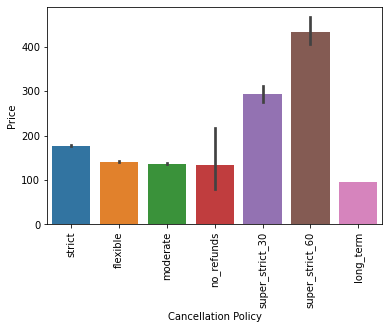

In [225]:
plt.xticks(rotation=90)
sns.barplot(x=df2['Cancellation Policy'],y=df2['Price'],data=df2) 

In [226]:
#as we can see from the grapgh that super strict policy has more price of the property
# we cans ay that price of the proprety is affected by cancellation policy


In [227]:
df_cat1['Cancellation Policy'].unique()

array(['strict', 'flexible', 'moderate', 'no_refunds', 'super_strict_30',
       'super_strict_60', 'long_term'], dtype=object)

In [233]:
# we can simply more like flexible,moerate to put in one group 
#super strict 30, super strict 60
df_cat1['Cancellation Policy'].replace(to_replace=['flexible','moderate','super_strict_30','super_strict_60'],value=['normal','normal','super_strict','super_strict'],inplace=True)

In [234]:
df_cat1['Cancellation Policy'].unique()

array(['strict', 'normal', 'no_refunds', 'super_strict', 'long_term'],
      dtype=object)

In [235]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()


In [245]:
a=le.fit_transform(df_cat1['Cancellation Policy'])  
b=pd.DataFrame(a,columns=['Cancellation Policy 1'])    # we apply 
b['Cancellation Policy 1'].unique()

array([3, 2, 1, 4, 0])

In [243]:
df_cat1.columns

Index(['Neighbourhood Cleansed', 'State', 'Zipcode', 'Market', 'Property Type',
       'Room Type', 'Bed Type', 'Cancellation Policy',
       'Host Response Time ord'],
      dtype='object')

In [254]:
df_cat1['Neighbourhood Cleansed'].unique()

array(['Humboldt Park', 'East Garfield Park', 'South Lawndale', ...,
       'Bay Terrace, Staten Island', 'Sobrante Park', 'Seminary'],
      dtype=object)

In [256]:
df_cat1.drop('Zipcode',axis=1,inplace=True) # state le lia to zip code ki need nhi h

In [257]:
df_cat1.columns

Index(['Neighbourhood Cleansed', 'State', 'Market', 'Property Type',
       'Room Type', 'Bed Type', 'Cancellation Policy',
       'Host Response Time ord'],
      dtype='object')

In [259]:
df_cat1['Bed Type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

<AxesSubplot:xlabel='Bed Type', ylabel='Price'>

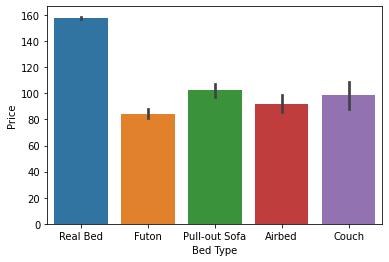

In [260]:
sns.barplot(x=df2['Bed Type'],y=df2['Price'],data=df2)

In [261]:
# those having real bed are having more price 

In [263]:
df_cat1['Bed Type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

In [264]:
hrt_1 = {'Real Bed':1,'Pull-out Sofa':2,'Couch':3,'Airbed':4,'Futon':5}
df_cat1['Bed Type 1'] = df_cat1['Bed Type'].map(hrt_1)

In [266]:
df_cat1.drop('Bed Type',axis=1,inplace=True)

In [267]:
df_cat1.head()

,Neighbourhood Cleansed,State,Market,Property Type,Room Type,Cancellation Policy,Host Response Time ord,Bed Type 1
241,Humboldt Park,IL,Chicago,Apartment,Private room,strict,1,1
242,Humboldt Park,IL,Chicago,House,Private room,normal,3,1
243,Humboldt Park,IL,Chicago,Apartment,Private room,normal,1,1
244,Humboldt Park,IL,Chicago,Apartment,Entire home/apt,normal,1,1
245,East Garfield Park,IL,Chicago,House,Private room,strict,1,1


In [269]:
df_cat1['Room Type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<AxesSubplot:xlabel='Room Type', ylabel='Price'>

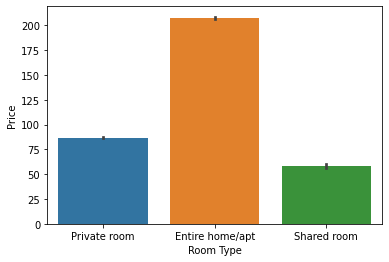

In [270]:
sns.barplot(x=df2['Room Type'],y=df2['Price'],data=df2)

In [271]:
# entire room has more price

In [272]:
df_cat1['Room Type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [273]:
hrt_2 = {'Entire home/apt':1,'Private room':2,'Shared room':3}
df_cat1['Room_Type_1'] = df_cat1['Room Type'].map(hrt_2)

In [274]:
df_cat1.drop('Room Type',axis=1,inplace=True)

In [275]:
df_cat1.head()

,Neighbourhood Cleansed,State,Market,Property Type,Cancellation Policy,Host Response Time ord,Bed Type 1,Room_Type_1
241,Humboldt Park,IL,Chicago,Apartment,strict,1,1,2
242,Humboldt Park,IL,Chicago,House,normal,3,1,2
243,Humboldt Park,IL,Chicago,Apartment,normal,1,1,2
244,Humboldt Park,IL,Chicago,Apartment,normal,1,1,1
245,East Garfield Park,IL,Chicago,House,strict,1,1,2


In [276]:
df_cat1['Property Type'].unique()

array(['Apartment', 'House', 'Townhouse', 'Condominium', 'Guesthouse',
       'Other', 'Camper/RV', 'Bungalow', 'Villa', 'Treehouse',
       'Bed & Breakfast', 'Loft', 'Cabin', 'Dorm', 'Hostel', 'Chalet',
       'Boat', 'Tent', 'Guest suite', 'In-law', 'Lighthouse',
       'Serviced apartment', 'Hut', 'Boutique hotel', 'Timeshare', 'Yurt',
       'Castle', 'Tipi', 'Nature lodge', 'Train', 'Cave', 'Earth House',
       'Entire Floor', 'Vacation home', 'Island', 'Casa particular',
       'Plane', 'Pension (Korea)'], dtype=object)

<AxesSubplot:xlabel='Property Type', ylabel='Price'>

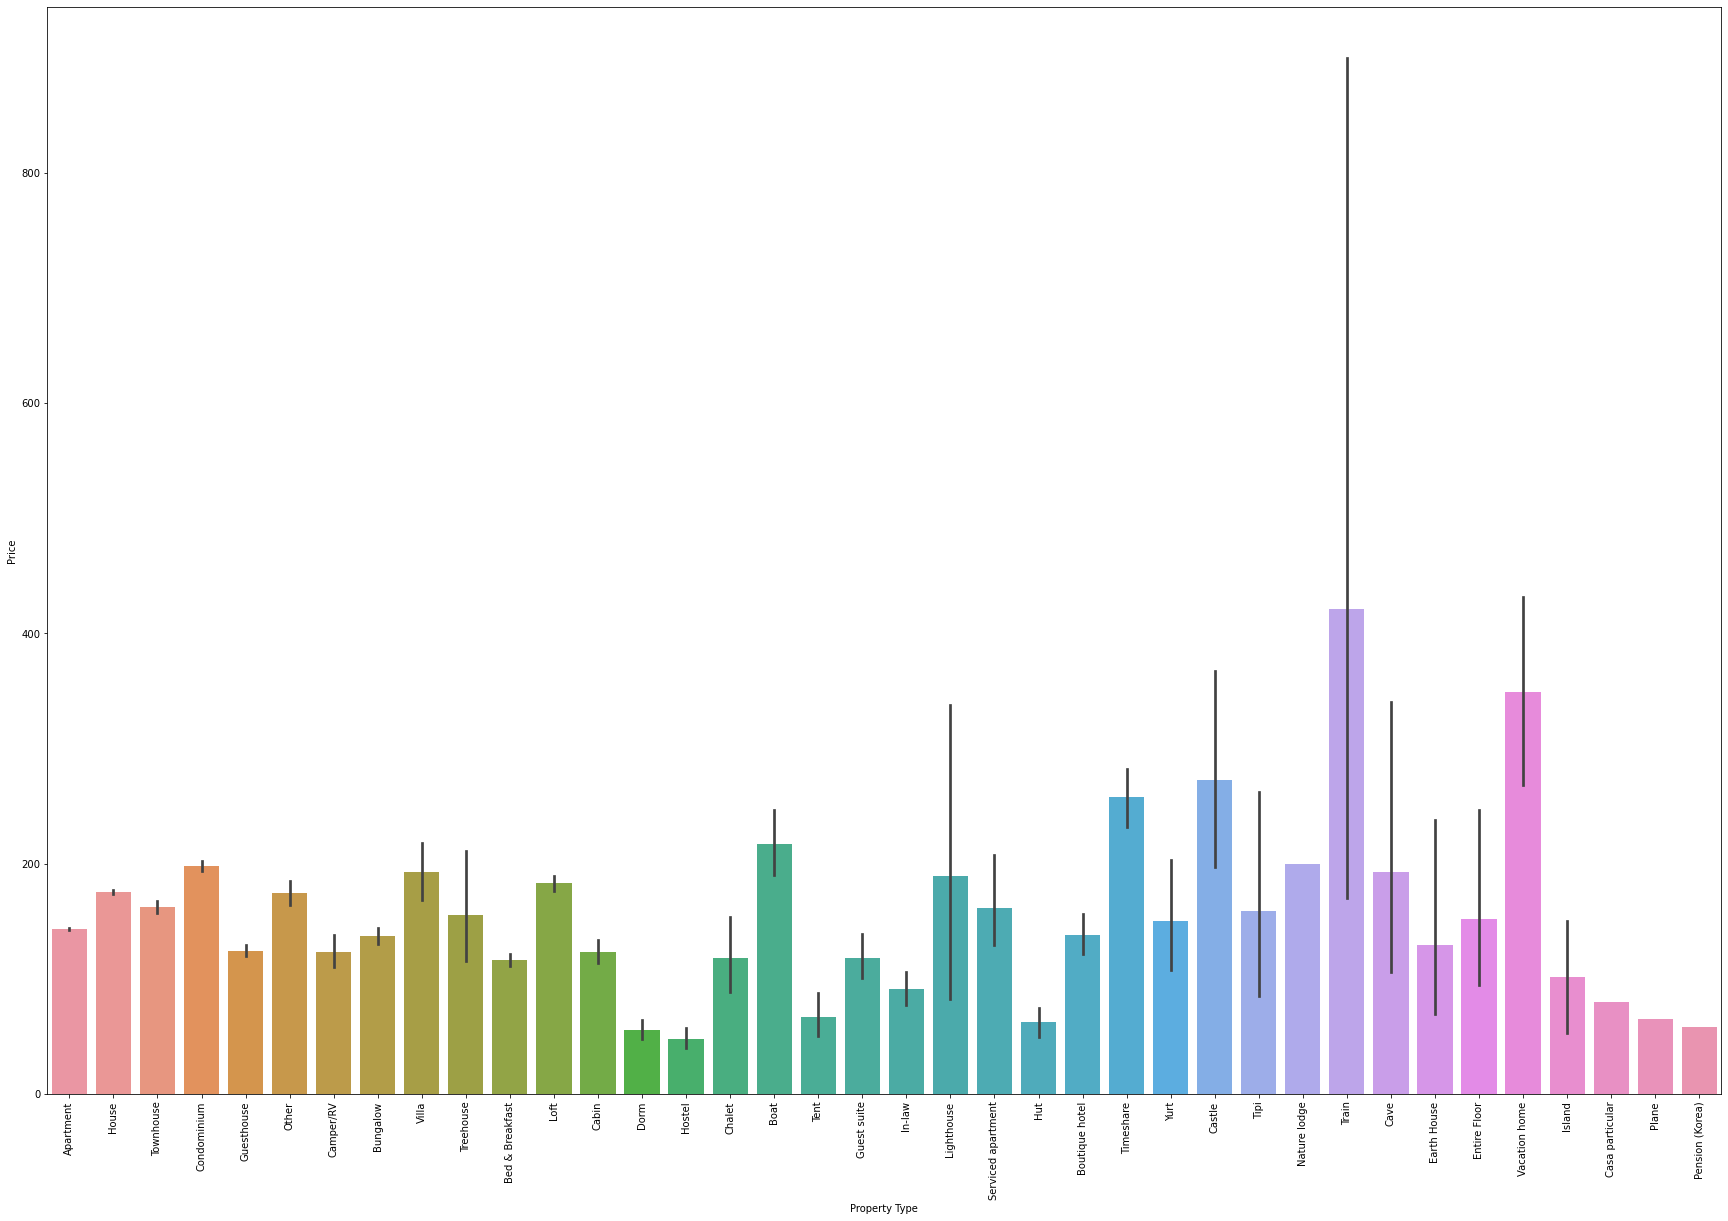

In [278]:
plt.figure(figsize=[30,20])
plt.xticks(rotation=90)
sns.barplot(df2['Property Type'],y=df2['Price'],data=df2)

In [281]:
e=le.fit_transform(df_cat1['Property Type'])  
f=pd.DataFrame(e,columns=['Property_Type_1'])    # we apply 
f['Property_Type_1'].unique()

array([ 0, 18, 32, 11, 16, 25,  6,  4, 36, 34,  1, 23,  5, 12, 17, 10,  2,
       29, 15, 20, 22, 28, 19,  3, 30, 37,  8, 31, 24, 33,  9, 13, 14, 35,
       21,  7, 27, 26])

In [290]:
aa=pd.concat([f,b],axis=1)
aa

,Property_Type_1,Cancellation Policy 1
0,0,3
1,18,2
2,0,2
3,0,2
4,18,3
...,...,...
130566,0,2
130567,18,2
130568,18,2
130569,18,2


In [292]:
df_cat1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 130571 entries, 241 to 494571
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Neighbourhood Cleansed  130571 non-null  object
 1   State                   130571 non-null  object
 2   Market                  130571 non-null  object
 3   Property Type           130571 non-null  object
 4   Cancellation Policy     130571 non-null  object
 5   Host Response Time ord  130571 non-null  int64 
 6   Bed Type 1              130571 non-null  int64 
 7   Room_Type_1             130571 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 13.0+ MB


In [295]:
a.dtype

dtype('int32')

In [305]:
df_cat1=df_cat1.reset_index().drop('index',axis=1)

In [310]:
df_cat1=pd.concat([df_cat1,aa],axis=1)

In [312]:
df_cat1.drop('Cancellation Policy',axis=1,inplace=True)

In [313]:
df_cat1.head()

,Neighbourhood Cleansed,State,Market,Property Type,Host Response Time ord,Bed Type 1,Room_Type_1,Property_Type_1,Cancellation Policy 1
0,Humboldt Park,IL,Chicago,Apartment,1,1,2,0,3
1,Humboldt Park,IL,Chicago,House,3,1,2,18,2
2,Humboldt Park,IL,Chicago,Apartment,1,1,2,0,2
3,Humboldt Park,IL,Chicago,Apartment,1,1,1,0,2
4,East Garfield Park,IL,Chicago,House,1,1,2,18,3


In [314]:
df_cat1.drop('Property Type',axis=1,inplace=True)

In [315]:
df_cat1.head()

,Neighbourhood Cleansed,State,Market,Host Response Time ord,Bed Type 1,Room_Type_1,Property_Type_1,Cancellation Policy 1
0,Humboldt Park,IL,Chicago,1,1,2,0,3
1,Humboldt Park,IL,Chicago,3,1,2,18,2
2,Humboldt Park,IL,Chicago,1,1,2,0,2
3,Humboldt Park,IL,Chicago,1,1,1,0,2
4,East Garfield Park,IL,Chicago,1,1,2,18,3


In [317]:
df_cat1['Neighbourhood Cleansed'].nunique()

1196

In [319]:
encode=(df_cat1['Neighbourhood Cleansed'].value_counts()/df_cat1['Neighbourhood Cleansed'].value_counts().sum())*100

In [320]:
df_cat1['Neighbourhood_Cleansed_1']=df_cat1['Neighbourhood Cleansed'].map(encode)

In [321]:
df_cat1.head()

,Neighbourhood Cleansed,State,Market,Host Response Time ord,Bed Type 1,Room_Type_1,Property_Type_1,Cancellation Policy 1,Neighbourhood_Cleansed_1
0,Humboldt Park,IL,Chicago,1,1,2,0,3,0.036762
1,Humboldt Park,IL,Chicago,3,1,2,18,2,0.036762
2,Humboldt Park,IL,Chicago,1,1,2,0,2,0.036762
3,Humboldt Park,IL,Chicago,1,1,1,0,2,0.036762
4,East Garfield Park,IL,Chicago,1,1,2,18,3,0.041357


In [322]:
df_cat1.drop('Neighbourhood Cleansed',axis=1,inplace=True)

In [423]:
df_cat1.head()

,Host Response Time ord,Bed Type 1,Room_Type_1,Property_Type_1,Cancellation Policy 1,Neighbourhood_Cleansed_1,Host Since Days,North east,midwest,south,west,Market_1
0,1,1,2,0,3,0.036762,3476,0,1,0,0,3.946512
1,3,1,2,18,2,0.036762,2499,0,1,0,0,3.946512
2,1,1,2,0,2,0.036762,2624,0,1,0,0,3.946512
3,1,1,1,0,2,0.036762,2749,0,1,0,0,3.946512
4,1,1,2,18,3,0.041357,3840,0,1,0,0,3.946512


In [325]:
df_cat1.State.unique()

array(['IL', 'CA', 'CO', 'TN', 'LA', 'ca', 'MA', 'TX', 'OR', 'WA', 'wa',
       'DC', 'NY', 'ny', 'MP', 'MD', 'il', 'Il', 'NJ', 'Ca', 'VT'],
      dtype=object)

In [326]:
df_cat1.State.replace(to_replace=['wa','il','Il','ca','Ca','ny'],value=['WA','IL','IL','CA','CA','NY'],inplace=True)

In [327]:
df_cat1.State.unique()

array(['IL', 'CA', 'CO', 'TN', 'LA', 'MA', 'TX', 'OR', 'WA', 'DC', 'NY',
       'MP', 'MD', 'NJ', 'VT'], dtype=object)

In [328]:
midwest=['IL']
west=['CA','CO','OR']
south=['TN','LA','TX','WA','DC','MD']
Northeast=['MA','NY','MP','NJ','VT']


In [329]:
def out(x):
    if x in midwest:
        return('midwest')
    elif x in west :
        return('west')
    elif x in south :
        return('south')
    else :
        return('North east')

In [330]:
df_cat1.State.apply(out).value_counts()

west          53165
North east    43437
south         28816
midwest        5153
Name: State, dtype: int64

In [331]:
df_cat1['state_1']=df_cat1.State.apply(out)

In [332]:
df_cat1.head()

,State,Market,Host Response Time ord,Bed Type 1,Room_Type_1,Property_Type_1,Cancellation Policy 1,Neighbourhood_Cleansed_1,state_1
0,IL,Chicago,1,1,2,0,3,0.036762,midwest
1,IL,Chicago,3,1,2,18,2,0.036762,midwest
2,IL,Chicago,1,1,2,0,2,0.036762,midwest
3,IL,Chicago,1,1,1,0,2,0.036762,midwest
4,IL,Chicago,1,1,2,18,3,0.041357,midwest


In [333]:
df_cat1.drop('State',axis=1,inplace=True)

In [335]:
df_cat1.head()

,Market,Host Response Time ord,Bed Type 1,Room_Type_1,Property_Type_1,Cancellation Policy 1,Neighbourhood_Cleansed_1,state_1
0,Chicago,1,1,2,0,3,0.036762,midwest
1,Chicago,3,1,2,18,2,0.036762,midwest
2,Chicago,1,1,2,0,2,0.036762,midwest
3,Chicago,1,1,1,0,2,0.036762,midwest
4,Chicago,1,1,2,18,3,0.041357,midwest


In [337]:
df_cat['Host Since']

241       2012-10-11
242       2015-06-15
243       2015-02-10
244       2014-10-08
245       2011-10-13
             ...    
494567    2012-06-20
494568    2017-02-19
494569    2014-07-17
494570    2015-03-29
494571    2016-05-05
Name: Host Since, Length: 130571, dtype: object

In [340]:
#df_sales['vintage']=
today_date = pd.to_datetime(pd.to_datetime("today").date())
df_cat["Host Since"] = pd.to_datetime(df_cat["Host Since"])
df_cat["Host Since Days"] = (today_date - df_cat["Host Since"])
df_cat['Host Since Days'] = df_cat[['Host Since Days']].apply(pd.to_numeric)
df_cat['Host Since Days'] = df_cat['Host Since Days'] / (24*60*60*1e9) #np.timedelta64(1, 'D')
df_cat["Host Since Days"] = df_cat["Host Since Days"].astype(int)

In [341]:
df_cat.head()

,Host Since,Host Response Time,Neighbourhood Cleansed,State,Zipcode,Market,Property Type,Room Type,Bed Type,Cancellation Policy,Host Since Days
241,2012-10-11,within an hour,Humboldt Park,IL,60647,Chicago,Apartment,Private room,Real Bed,strict,3476
242,2015-06-15,within a day,Humboldt Park,IL,60651,Chicago,House,Private room,Real Bed,flexible,2499
243,2015-02-10,within an hour,Humboldt Park,IL,60651,Chicago,Apartment,Private room,Real Bed,moderate,2624
244,2014-10-08,within an hour,Humboldt Park,IL,60651,Chicago,Apartment,Entire home/apt,Real Bed,flexible,2749
245,2011-10-13,within an hour,East Garfield Park,IL,60624,Chicago,House,Private room,Real Bed,strict,3840


In [343]:
nyi_days=df_cat.loc[:,['Host Since Days']]

In [347]:
zz=nyi_days.reset_index().drop('index',axis=1)
zz

,Host Since Days
0,3476
1,2499
2,2624
3,2749
4,3840
...,...
130566,3589
130567,1884
130568,2832
130569,2577


In [377]:
df_cat1=pd.concat([df_cat1,zz],axis=1)

In [379]:
xx=pd.get_dummies(df_cat1['state_1'])

In [380]:
df_cat1=pd.concat([df_cat1,xx],axis=1)

In [381]:
df_cat1.head()

,Market,Host Response Time ord,Bed Type 1,Room_Type_1,Property_Type_1,Cancellation Policy 1,Neighbourhood_Cleansed_1,state_1,Host Since Days,North east,midwest,south,west
0,Chicago,1,1,2,0,3,0.036762,midwest,3476,0,1,0,0
1,Chicago,3,1,2,18,2,0.036762,midwest,2499,0,1,0,0
2,Chicago,1,1,2,0,2,0.036762,midwest,2624,0,1,0,0
3,Chicago,1,1,1,0,2,0.036762,midwest,2749,0,1,0,0
4,Chicago,1,1,2,18,3,0.041357,midwest,3840,0,1,0,0


In [382]:
df_cat1.head()

,Market,Host Response Time ord,Bed Type 1,Room_Type_1,Property_Type_1,Cancellation Policy 1,Neighbourhood_Cleansed_1,state_1,Host Since Days,North east,midwest,south,west
0,Chicago,1,1,2,0,3,0.036762,midwest,3476,0,1,0,0
1,Chicago,3,1,2,18,2,0.036762,midwest,2499,0,1,0,0
2,Chicago,1,1,2,0,2,0.036762,midwest,2624,0,1,0,0
3,Chicago,1,1,1,0,2,0.036762,midwest,2749,0,1,0,0
4,Chicago,1,1,2,18,3,0.041357,midwest,3840,0,1,0,0


In [383]:
df_cat1.drop('state_1',axis=1,inplace=True)

In [384]:
df_cat1.head()

,Market,Host Response Time ord,Bed Type 1,Room_Type_1,Property_Type_1,Cancellation Policy 1,Neighbourhood_Cleansed_1,Host Since Days,North east,midwest,south,west
0,Chicago,1,1,2,0,3,0.036762,3476,0,1,0,0
1,Chicago,3,1,2,18,2,0.036762,2499,0,1,0,0
2,Chicago,1,1,2,0,2,0.036762,2624,0,1,0,0
3,Chicago,1,1,1,0,2,0.036762,2749,0,1,0,0
4,Chicago,1,1,2,18,3,0.041357,3840,0,1,0,0


In [385]:
encode1=(df_cat1.Market.value_counts()/df_cat1.Market.value_counts().sum())*100

In [386]:
df_cat1['Market_1']=df_cat1.Market.map(encode1)

In [387]:
df_cat1.head()

,Market,Host Response Time ord,Bed Type 1,Room_Type_1,Property_Type_1,Cancellation Policy 1,Neighbourhood_Cleansed_1,Host Since Days,North east,midwest,south,west,Market_1
0,Chicago,1,1,2,0,3,0.036762,3476,0,1,0,0,3.946512
1,Chicago,3,1,2,18,2,0.036762,2499,0,1,0,0,3.946512
2,Chicago,1,1,2,0,2,0.036762,2624,0,1,0,0,3.946512
3,Chicago,1,1,1,0,2,0.036762,2749,0,1,0,0,3.946512
4,Chicago,1,1,2,18,3,0.041357,3840,0,1,0,0,3.946512


In [388]:
df_cat1.drop('Market',axis=1,inplace=True)

In [389]:
df_cat1.head()

,Host Response Time ord,Bed Type 1,Room_Type_1,Property_Type_1,Cancellation Policy 1,Neighbourhood_Cleansed_1,Host Since Days,North east,midwest,south,west,Market_1
0,1,1,2,0,3,0.036762,3476,0,1,0,0,3.946512
1,3,1,2,18,2,0.036762,2499,0,1,0,0,3.946512
2,1,1,2,0,2,0.036762,2624,0,1,0,0,3.946512
3,1,1,1,0,2,0.036762,2749,0,1,0,0,3.946512
4,1,1,2,18,3,0.041357,3840,0,1,0,0,3.946512


In [391]:
df_num3.head()

,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Extra_people,Minimum Nights,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,0.317206,-1.045902,-0.449154,-0.370885,-0.599209,-0.995039,-0.094036,-1.178355,-0.577403,-0.027689,...,-0.143191,0.787393,0.419371,0.509426,0.306354,0.298647,-0.912777,0.549619,-0.146142,1.031718
1,0.317206,-0.602341,0.383739,-0.370885,-0.599209,-0.702746,-0.094036,-1.114885,0.556128,-0.215261,...,0.557513,0.202871,0.419371,0.509426,0.306354,0.298647,-0.912777,0.549619,-0.249515,0.123987
2,0.317206,-0.602341,-0.449154,-0.370885,-0.599209,-0.856200,-0.094036,-1.220668,0.102715,-0.215261,...,-0.493544,0.787393,0.419371,-0.614406,0.306354,0.298647,0.505822,0.549619,-0.249515,0.221827
3,0.317206,1.171904,-0.449154,0.759500,0.904366,-0.702746,-0.094036,-1.009101,-0.123991,-0.215261,...,-0.385743,0.349001,-1.020295,-0.614406,0.306354,0.298647,-0.912777,0.549619,-0.146142,2.396031
4,0.048144,-0.602341,-0.449154,-0.370885,-0.599209,-0.856200,-0.094036,-1.136042,-0.123991,-0.121475,...,1.608569,0.202871,0.419371,-0.614406,0.306354,0.298647,-2.331377,-0.759615,-0.042768,2.711291


In [392]:
df_final=pd.concat([df_num3,df_cat1],axis=1)

In [394]:
df_final.head()

,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Extra_people,Minimum Nights,...,Room_Type_1,Property_Type_1,Cancellation Policy 1,Neighbourhood_Cleansed_1,Host Since Days,North east,midwest,south,west,Market_1
0,0.317206,-1.045902,-0.449154,-0.370885,-0.599209,-0.995039,-0.094036,-1.178355,-0.577403,-0.027689,...,2,0,3,0.036762,3476,0,1,0,0,3.946512
1,0.317206,-0.602341,0.383739,-0.370885,-0.599209,-0.702746,-0.094036,-1.114885,0.556128,-0.215261,...,2,18,2,0.036762,2499,0,1,0,0,3.946512
2,0.317206,-0.602341,-0.449154,-0.370885,-0.599209,-0.856200,-0.094036,-1.220668,0.102715,-0.215261,...,2,0,2,0.036762,2624,0,1,0,0,3.946512
3,0.317206,1.171904,-0.449154,0.759500,0.904366,-0.702746,-0.094036,-1.009101,-0.123991,-0.215261,...,1,0,2,0.036762,2749,0,1,0,0,3.946512
4,0.048144,-0.602341,-0.449154,-0.370885,-0.599209,-0.856200,-0.094036,-1.136042,-0.123991,-0.121475,...,2,18,3,0.041357,3840,0,1,0,0,3.946512


In [396]:
df_final.loc[:,['Host Since Days','Price']].corr()

,Host Since Days,Price
Host Since Days,1.000000,0.029125
Price,0.029125,1.000000


In [397]:
# price doesn't depend on host since days so we cam also keep or can remove this feature

In [398]:
from sklearn.model_selection import train_test_split

In [404]:
x=df_final.drop('Price',axis=1)
y=df_final['Price']


In [405]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=10)

In [407]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [408]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [409]:
r2_score(ytest,pred)

0.5014778033392638

In [410]:
mean_squared_error(ytest,pred)

0.49797200654860807

In [412]:
a=mean_absolute_error(ytest,pred)

In [413]:
np.sqrt(a)

0.6576556039922702

In [417]:
dfc = pd.DataFrame(df_final.corr(method="pearson")["Price"])
dfc.reset_index(inplace=True)
dfc.columns = ["features", "correlation_with_price"]
dfc.sort_values("correlation_with_price", ascending=False)
df1 = dfc[dfc["correlation_with_price"] > 0.00]
corr_features = df1["features"].values
corr_features.tolist().append("Price")
df1

,features,correlation_with_price
0,Host Response Rate,0.007223
1,Accommodates,0.572736
2,Bathrooms,0.460469
3,Bedrooms,0.546271
4,Beds,0.483264
5,Price,1.000000
6,Security Deposit,0.239177
7,Cleaning Fee,0.555202
8,Extra_people,0.098623
9,Minimum Nights,0.007609


In [418]:
from statsmodels.formula.api import ols
import statsmodels
import statsmodels.api as sm
x= sm.add_constant(x)



# building a model with an intercept
# fit() is used to fit the OLS model
SLR_model = sm.OLS(y,x).fit()
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     3728.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:30:40   Log-Likelihood:            -1.4003e+05
No. Observations:              130571   AIC:                         2.801e+05
Df Residuals:                  130535   BIC:                         2.805e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [416]:
df_cat1.columns

Index(['Host Response Time ord', 'Bed Type 1', 'Room_Type_1',
       'Property_Type_1', 'Cancellation Policy 1', 'Neighbourhood_Cleansed_1',
       'Host Since Days', 'North east', 'midwest', 'south', 'west',
       'Market_1'],
      dtype='object')

In [430]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=20,random_state=10)
regressor.fit(xtrain,ytrain)
ypred5=regressor.predict(xtest)

In [431]:
r2_score(ytest,ypred5)

0.6164928482226906

In [433]:
np.sqrt(mean_squared_error(ytest,ypred5))

0.6189377166705332

In [425]:
df_cat.head()

,Host Since,Host Response Time,Neighbourhood Cleansed,State,Zipcode,Market,Property Type,Room Type,Bed Type,Cancellation Policy,Host Since Days
241,2012-10-11,within an hour,Humboldt Park,IL,60647,Chicago,Apartment,Private room,Real Bed,strict,3476
242,2015-06-15,within a day,Humboldt Park,IL,60651,Chicago,House,Private room,Real Bed,flexible,2499
243,2015-02-10,within an hour,Humboldt Park,IL,60651,Chicago,Apartment,Private room,Real Bed,moderate,2624
244,2014-10-08,within an hour,Humboldt Park,IL,60651,Chicago,Apartment,Entire home/apt,Real Bed,flexible,2749
245,2011-10-13,within an hour,East Garfield Park,IL,60624,Chicago,House,Private room,Real Bed,strict,3840


In [426]:
df_cat.drop('Zipcode',axis=1,inplace=True)

In [427]:
df_cat.head()

,Host Since,Host Response Time,Neighbourhood Cleansed,State,Market,Property Type,Room Type,Bed Type,Cancellation Policy,Host Since Days
241,2012-10-11,within an hour,Humboldt Park,IL,Chicago,Apartment,Private room,Real Bed,strict,3476
242,2015-06-15,within a day,Humboldt Park,IL,Chicago,House,Private room,Real Bed,flexible,2499
243,2015-02-10,within an hour,Humboldt Park,IL,Chicago,Apartment,Private room,Real Bed,moderate,2624
244,2014-10-08,within an hour,Humboldt Park,IL,Chicago,Apartment,Entire home/apt,Real Bed,flexible,2749
245,2011-10-13,within an hour,East Garfield Park,IL,Chicago,House,Private room,Real Bed,strict,3840


In [428]:
df_cat.drop('Host Since',axis=1,inplace=True)

In [429]:
df_cat.head()

,Host Response Time,Neighbourhood Cleansed,State,Market,Property Type,Room Type,Bed Type,Cancellation Policy,Host Since Days
241,within an hour,Humboldt Park,IL,Chicago,Apartment,Private room,Real Bed,strict,3476
242,within a day,Humboldt Park,IL,Chicago,House,Private room,Real Bed,flexible,2499
243,within an hour,Humboldt Park,IL,Chicago,Apartment,Private room,Real Bed,moderate,2624
244,within an hour,Humboldt Park,IL,Chicago,Apartment,Entire home/apt,Real Bed,flexible,2749
245,within an hour,East Garfield Park,IL,Chicago,House,Private room,Real Bed,strict,3840


In [434]:
from sklearn.preprocessing import OrdinalEncoder

In [435]:
oe=OrdinalEncoder()

In [439]:
a=oe.fit_transform(df_cat)

In [441]:
df_cat_dusri_eda=pd.DataFrame(a,columns=df_cat.columns)

In [442]:
df_final_dusra=pd.concat([df_num3,df_cat_dusri_eda],axis=1)

In [459]:
df_final_dusra.drop('Host Since Days',axis=1,inplace=True)

In [460]:
x1=df_final_dusra.drop('Price',axis=1)
y1=df_final_dusra['Price']

In [461]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=10)

In [462]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
pred1=model.predict(x_test)

In [463]:
r2_score(y_test,pred1)

0.4957666581191196

In [464]:
np.sqrt(mean_squared_error(y_test,pred1))

0.7097019435707684

In [465]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=20,random_state=10)
regressor.fit(x_train,y_train)
ypred5=regressor.predict(x_test)

In [466]:
r2_score(y_test,ypred5)

0.6130085764706237

In [457]:
np.sqrt(mean_squared_error(y_test,ypred5))

0.6196062650725477

In [467]:
#################################

In [471]:
a_num=df2.loc[:,[  'Accommodates', 'Bedrooms', 'Beds', 'Minimum Nights',
             'Availability 30', 'Availability 60', 'Availability 90',
             'Availability 365', 'Number of Reviews', 'Reviews per Month',
             'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness',
             'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location',
             'Review Scores Value', 'Host Response Rate']]

In [469]:
df2.columns

Index(['Host Since', 'Host Response Time', 'Host Response Rate',
       'Neighbourhood Cleansed', 'State', 'Zipcode', 'Market', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed Type', 'Price', 'Security Deposit', 'Cleaning Fee', 'Extra_people',
       'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')

In [472]:
a_num.isnull().sum()

Accommodates                       0
Bedrooms                           0
Beds                               0
Minimum Nights                     0
Availability 30                    0
Availability 60                    0
Availability 90                    0
Availability 365                   0
Number of Reviews                  0
Reviews per Month              28795
Review Scores Rating           30213
Review Scores Accuracy         30431
Review Scores Cleanliness      30384
Review Scores Checkin          30512
Review Scores Communication    30382
Review Scores Location         30512
Review Scores Value            30538
Host Response Rate             29240
dtype: int64

In [473]:
a_cat=df2.loc[:,['State', "Neighbourhood Cleansed",
                    "Property Type", "Room Type", "Bed Type", "Cancellation Policy",
                    "Host Response Time"]]